In [274]:
#Importing libraries
#### Libraries From Pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
# Pandas
import pandas as pd
# matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os
os.chdir("D:\\Assignment1")
from sklearn.model_selection import train_test_split

In [275]:
# Load the dataset
df=pd.read_csv("diabetes.csv")

**Exploratory Data Analysis**

In [276]:
# Head of the dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [277]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [278]:
# Statistical summary of the dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Data Cleaning**

In [279]:
# Check shape before dropping duplicates
df.shape

(768, 9)

In [280]:
# Check shape after dropping duplicates
df = df.drop_duplicates()
df.shape

(768, 9)

In [281]:
# Chek the null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Analysing Relationships**

In [282]:
# Correlation analysis
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


**Model**

In [283]:
# independent features
X=df.drop('Outcome',axis=1).values
# dependent features
y=df['Outcome'].values

In [284]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [285]:
# Creating Tensors
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train)
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test)

In [286]:
# Create a PyTorch Dataset and DataLoader
class DiabetesDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

train_dataset = DiabetesDataset(X_train, y_train)
test_dataset = DiabetesDataset(X_test, y_test)

batch_size = 30
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

In [287]:
# Define the Perceptron Model
class Perceptron(nn.Module):
    def __init__(self, input_size):
        super(Perceptron, self).__init__()
        self.fc = nn.Linear(input_size, 1)

    def forward(self, x):
        return torch.sigmoid(self.fc(x))

In [288]:
input_size = X_train.shape[1]
model = Perceptron(input_size)
criterion = nn.BCELoss()
#optimizer = optim.SGD(model.parameters(), lr=0.1)
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)

num_epochs = 500
losses = []

for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels.view(-1, 1))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    
    avg_loss = total_loss / len(train_loader)
    losses.append(avg_loss)

In [289]:
model.parameters

<bound method Module.parameters of Perceptron(
  (fc): Linear(in_features=8, out_features=1, bias=True)
)>

Accuracy: 0.7922077922077922
TP: 29, TN: 93, FP: 6, FN: 26
Confusion Matrix:
tensor([[93,  6],
        [26, 29]])
Precision: 0.8285714387893677
Recall: 0.5272727012634277
F1-Score: 0.6444444060325623


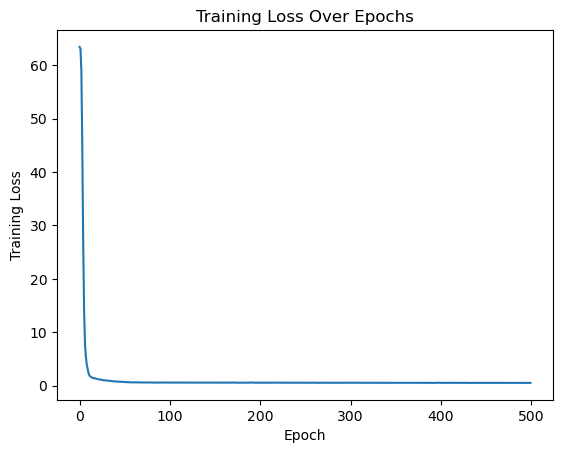

In [290]:
# Model Evaluation
model.eval()
with torch.no_grad():
    y_pred = (model(X_test) >= 0.5).float().view(-1)
    accuracy = torch.sum(y_pred == y_test).item() / len(y_test)
    
    # Calculate the confusion matrix manually
    TP = torch.sum((y_pred == 1) & (y_test == 1))
    TN = torch.sum((y_pred == 0) & (y_test == 0))
    FP = torch.sum((y_pred == 1) & (y_test == 0))
    FN = torch.sum((y_pred == 0) & (y_test == 1))
    
    # Confusion Matrix
    confusion_matrix = torch.tensor([[TN, FP], [FN, TP]])
    
    # Calculate precision, recall, and F1-score
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    f1_score = 2 * (precision * recall) / (precision + recall)

print(f'Accuracy: {accuracy}')
print(f'TP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}')
print(f'Confusion Matrix:\n{confusion_matrix}')
print(f'Precision: {precision.item()}')
print(f'Recall: {recall.item()}')
print(f'F1-Score: {f1_score.item()}')

# Plot the Training Loss
plt.plot(range(num_epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss Over Epochs')
plt.show()


In [291]:
# Save the model
torch.save(model,'diabetes.pt')

In [292]:
# Save And Load the model
model=torch.load('diabetes.pt')

In [293]:
model.eval()

Perceptron(
  (fc): Linear(in_features=8, out_features=1, bias=True)
)

In [294]:
# Predcition of new data point
list(df.iloc[0,:-1])

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0]

In [297]:
# New Data
new_data = torch.tensor([6.0, 165.0, 72.0, 40.0, 0.0, 25.6, 0.627, 45.0], dtype=torch.float32)

In [298]:
# Predict new data using Pytorch
with torch.no_grad():
    output = model(new_data)
    prediction = 1 if output >= 0.5 else 0
print(f'Raw Output: {output.item()}')  # The raw output score (between 0 and 1)
print(f'Predicted Class: {prediction}')  # Predicted class (0 or 1)

Raw Output: 0.5419556498527527
Predicted Class: 1
